# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
5. Applicants with smaller loan amounts
6. Applicants who are married
7. Applicants with less dependants
8. Applicants who are not self-employed
9. Applicants with longer loan terms

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1300]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("/Users/karina/GitHub//mini-project-iv/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1301]:
df.shape

(614, 13)

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [1302]:
df.isna().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [1303]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


Look at some basic statistics for numerical variables.

In [1304]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [1305]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [1307]:
df_cat.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [1308]:
df_cat.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [1309]:
df_cat.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1310]:
df_cat.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [1311]:
df_cat.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [1312]:
df_cat.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [1313]:
import plotly.express as px
fig = px.histogram(df, x="ApplicantIncome", nbins=30, title='Applicant Income Histogram')
fig.show()


Look at box plots to understand the distributions. 

In [1314]:
fig = px.box(df, x="ApplicantIncome", title='Applicant Income BoxPlot')
fig.show()

Look at the distribution of income segregated  by `Education`

In [1315]:
fig = px.box(df, x="ApplicantIncome", y="Education", title='Applicant Income Segregated by Education')
fig.show()

Look at the histogram and boxplot of LoanAmount

In [1316]:
fig = px.histogram(df, x="LoanAmount", nbins=30, title='Loan Amount Histogram')
fig.show()

In [1317]:
fig = px.box(df, x="LoanAmount", title='Loan Amount Box Plot')
fig.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [1318]:
table = pd.pivot_table(df, columns=['Gender', 'Education'], values=['ApplicantIncome', 'LoanAmount'],index=['Loan_Status'], aggfunc={
    'ApplicantIncome': np.mean,
    'LoanAmount': np.mean
    })
table

ApplicantIncome                                         \
Gender               Female                      Male                
Education          Graduate Not Graduate     Graduate Not Graduate   
Loan_Status                                                          
N               4284.129032  3095.333333  6773.409524  3726.177778   
Y               4830.606557  5287.285714  5689.719557  3566.455882   

             LoanAmount                                        
Gender           Female                     Male               
Education      Graduate Not Graduate    Graduate Not Graduate  
Loan_Status                                                    
N            133.451613    99.200000  171.373737   125.292683  
Y            127.966102   116.214286  152.977273   116.151515

In [1319]:
table = pd.pivot_table(df, columns=['Property_Area'], values=['ApplicantIncome', 'LoanAmount'],index=['Loan_Status'], aggfunc={
    'ApplicantIncome': np.mean,
    'LoanAmount': np.mean
    })
table

ApplicantIncome                            LoanAmount  \
Property_Area           Rural    Semiurban        Urban       Rural   
Loan_Status                                                           
N                 6497.521739  5296.851852  4511.420290  158.742424   
Y                 4962.290909  5290.877095  5858.330827  148.261682   

                                       
Property_Area   Semiurban       Urban  
Loan_Status                            
N              154.566038  140.354839  
Y              142.760000  143.085271

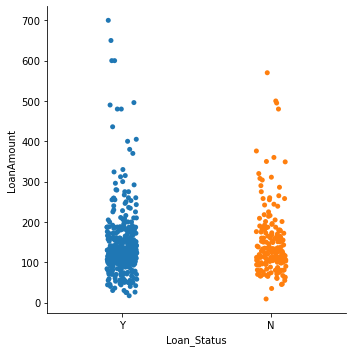

In [1610]:
import seaborn as sns
sns.catplot(x="Loan_Status", y="LoanAmount", data=df)

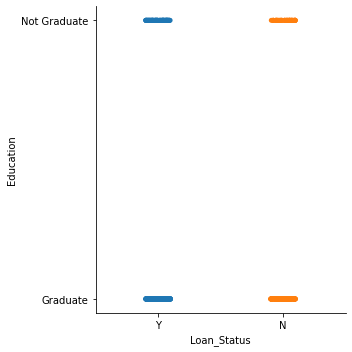

In [1611]:
sns.catplot(x="Loan_Status", y="Education", data=df)

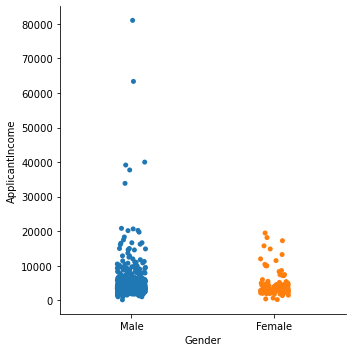

In [1322]:
sns.catplot(x="Gender", y="ApplicantIncome", data=df)

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [1602]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1603]:
data = df.copy()

print(data.Gender.mode())
print(data.Married.mode())
print(data.Education.mode())
print(data.Self_Employed.mode())
print(data.Credit_History.mode())
print(data.Dependents.mode())
print(data.LoanAmount.mean())
print(data.Loan_Amount_Term.mode())

0    Male
Name: Gender, dtype: object
0    Yes
Name: Married, dtype: object
0    Graduate
Name: Education, dtype: object
0    No
Name: Self_Employed, dtype: object
0    1.0
Name: Credit_History, dtype: float64
0    0
Name: Dependents, dtype: object
146.41216216216216
0    360.0
Name: Loan_Amount_Term, dtype: float64


In [1604]:
fill_values = {"Gender": 'Male','Married': 'Yes', "Educated": 'Graduate', 'Dependents': '0', "Self_Employed": 'No', 'LoanAmount': 146.4, 'Loan_Amount_Term': 360, 'Credit_History': 1.0}
data = data.fillna(value=fill_values)

In [1605]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1606]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Loan_ID,0,0.0
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0


ValueError: regplot inputs must be 1d

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [1431]:
fig = px.histogram(data, x="LoanAmount", title='Loan Amount Before Transformation')
fig.show()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

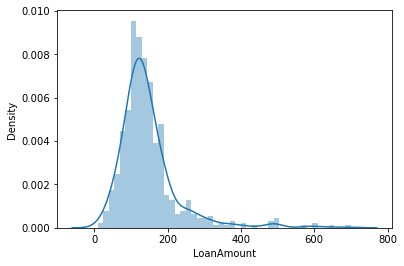

In [1432]:
sns.distplot(data["LoanAmount"])

In [1433]:
data["LoanAmountLog"] = data["LoanAmount"].apply(np.log)
fig = px.histogram(data, x="LoanAmountLog", title='Loan Amount After Transformation')
fig.show()

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

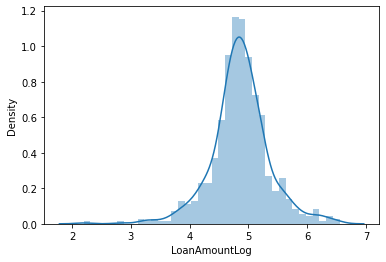

In [1434]:
sns.distplot(data["LoanAmountLog"])

Combine both incomes as total income and take a log transformation of the same.

In [1435]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncomeLog'] = data["TotalIncome"].apply(np.log)

In [1436]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,TotalIncome,TotalIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.4,360.0,1.0,Urban,Y,4.986343,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


## 4. Building a Predictive Model

In [1338]:
features = pd.read_csv('features_enc.csv')
features.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not_Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,TotalIncomeLog,LoanAmountLog,Credit_History,Loan_Status
0,0,1,1,0,1,0,1,0,0,0,1,8.674026,5.062595,1.0,1
1,0,1,0,1,1,0,1,0,1,0,0,8.714568,4.852030,1.0,0
2,0,1,0,1,1,0,0,1,0,0,1,8.006368,4.189655,1.0,1
3,0,1,0,1,0,1,1,0,0,0,1,8.505323,4.787492,1.0,1
4,0,1,1,0,1,0,1,0,0,0,1,8.699515,4.948760,1.0,1


In [1339]:
X = features.drop('Loan_Status', axis=1)
y = features['Loan_Status']

In [1340]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [1341]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

scaler = StandardScaler()
scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8097826086956522


In [1609]:
import seaborn as sns
sns.regplot(x=X, y=y, data=data, logistic=True)

ValueError: regplot inputs must be 1d

Try paramater grid search to improve the results

In [1342]:
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
grid_logreg = GridSearchCV(logreg, param_grid = grid_values, scoring='accuracy', cv=10, verbose=0)
grid_logreg.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/homebrew/Caskr

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [1343]:
print("tuned hpyerparameters :(best parameters) ",grid_logreg.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}


In [1344]:
logreg=LogisticRegression(C=0.1,penalty="l2")
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8097826086956522


In [1345]:
coefs_array = (np.round(logreg.coef_, decimals=3))
coeffs = []

for i in coefs_array[0]:
    coeffs.append(i)

len(coeffs)

14

In [1346]:
columns = list(X.columns.values)
len(columns)

14

In [1347]:
feature_importance = pd.DataFrame()
feature_importance['feature'] = columns
feature_importance['coefficient'] = coeffs
feature_importance.sort_values(by='coefficient', ascending=False)

,feature,coefficient
13,Credit_History,1.122
9,Property_Area_Semiurban,0.203
3,Married_Yes,0.096
4,Education_Graduate,0.062
1,Gender_Male,0.040
6,Self_Employed_No,0.028
12,LoanAmountLog,-0.000
10,Property_Area_Urban,-0.021
7,Self_Employed_Yes,-0.028
0,Gender_Female,-0.040


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [1348]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('classifier', LogisticRegression())])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')

Test set accuracy: 0.8097826086956522


In [1349]:
import pickle
filename = 'pipeline.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [1350]:
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
param_grid = {'classifier': [RidgeClassifier(alpha=0.1), RidgeClassifier(alpha=0.01), RidgeClassifier(alpha=1.0), SVC()]}
grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

Best test set accuracy: 0.8097826086956522
Achieved with hyperparameters: {'classifier': RidgeClassifier(alpha=0.1)}


## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [1503]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeClassifier
import pickle

In [1504]:
features = pd.read_csv('features.csv')
features.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,158.0,360.0,1.0,Urban,Y,5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [1505]:
# class RawFeats:
#     def __init__(self, feats):
#         self.feats = feats

#     def fit(self, X, y=None):
#         pass


#     def transform(self, X, y=None):
#         return X[self.feats]

#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)
    
# feats = ['Gender','Married','Education','Self_Employed','ApplicantIncome',
#          'CoapplicantIncome','LoanAmount', 'Credit_History', 'Property_Area']

# raw_feats = RawFeats(feats)

In [1506]:
class DataframeFunctionTransformer:
    def init(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

def create_total_income_feature(input_df):
    input_df['total_income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    return input_df

def to_dataframe(array):
    columns= ['Gender','Dependents','Married','Self_Employed','LoanAmount',
               'Loan_Amount_Term','Credit_History','Education','ApplicantIncome',
               'CoapplicantIncome','Property_Area','total_income']

    return pd.DataFrame(array, columns = columns)

In [1507]:
scaler = StandardScaler()
enc = OneHotEncoder()
logreg = LogisticRegression()
le = LabelEncoder()

In [1508]:
X = features.drop(columns=['Loan_Status', 'Loan_ID'])
y = le.fit_transform(features['Loan_Status'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

In [1509]:
from sklearn.preprocessing import FunctionTransformer

def create_total_income_feature(X):
    X['total_income'] = X['ApplicantIncome'] + X['CoapplicantIncome']
    return X

total_income_object = FunctionTransformer(create_total_income_feature)

def log_transform(X):
    X_log = np.log(X)
    return X_log

log_transform_object = FunctionTransformer(log_transform)

TotalIncome = ColumnTransformer([('total_income', total_income_object, [['ApplicantIncome', 'CoapplicantIncome']])])
log_trans = ColumnTransformer([
     ('log_trans', FunctionTransformer(log_transform_object), ['LoanAmount','total_income'])],
     remainder='passthrough')

In [1510]:
numeric_pipeline = Pipeline([('total_income', TotalIncome),
                            ('log_trans', log_trans),
                            ('impute_mean', SimpleImputer(strategy='mean')), 
                            ('scaling', StandardScaler())])

categorical_pipeline = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing_features = ColumnTransformer([('numeric', numeric_pipeline, ['log_LoanAmount', 'log_TotalIncome', 'Credit_History']), 
                                    ('categorical', categorical_pipeline, ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])])

pipeline = Pipeline([
    ('preprocessing', preprocessing_features),
    ('encodig', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('rf', RandomForestClassifier(n_estimators=1000))
])

In [1511]:
pipeline_features = Pipeline([('preprocessing', preprocessing_features), 
('model', LogisticRegression())])
pipeline_features.fit(X_train, y_train)

ValueError: A given column is not a column of the dataframe

In [1512]:
accuracy_score = pipeline_features.score(X_test, y_test)
accuracy_score

AttributeError: 'ColumnTransformer' object has no attribute 'transformers_'

In [1513]:
pipeline = Pipeline(steps=[('preprocessing', preprocessing_features),
                           ('classifier', RidgeClassifier())])

param_grid = {'classifier__alpha': [0.001, 0.01, 0.1, 1.0]}
grid = GridSearchCV(pipeline, param_grid=param_grid)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 136, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 163, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5198, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5206, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'log_LoanAmount'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/utils/__init__.py", line 416, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3623, in get_loc
    raise KeyError(key) from err
KeyError: 'log_LoanAmount'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 670, in fit_transform
    self._validate_column_callables(X)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 357, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/utils/__init__.py", line 424, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [1514]:
numeric_transform = ColumnTransformer([
    ('TotalIncome', TotalIncome, [['ApplicantIncome', 'CoapplicantIncome']]),
    ('log_LoanAmount', log_transform_object, ['LoanAmount']),
    ('log_TotalIncome', log_transform_object, ['TotalIncome'])], 
    remainder='passthrough')

In [1593]:
df = pd.read_csv("/Users/karina/GitHub/mini-project-iv/data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [1613]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
import pickle

In [1587]:
df['Loan_Status'] = df['Loan_Status'].replace({'Y' :1, 'N':0})

y = df.pop('Loan_Status')
X = df.drop('Loan_ID',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [1588]:
class DataframeFunctionTransformer:
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

def create_total_income_feature(input_df):
    input_df['total_income'] = input_df['ApplicantIncome'] + input_df['CoapplicantIncome']
    return input_df

def to_dataframe(array):
    columns= ['Gender','Dependents','Married','Self_Employed','LoanAmount',
               'Loan_Amount_Term','Credit_History','Education','ApplicantIncome',
               'CoapplicantIncome','Property_Area','total_income']
    
    return pd.DataFrame(array, columns = columns)

# def log_transform(X):
#     X_log = np.log(X)
#     return X_log

# log_transform_object = FunctionTransformer(log_transform)

In [1598]:
fillna_transformer = ColumnTransformer([
     ('fillna_mode', SimpleImputer(strategy="most_frequent"), ['Gender','Dependents']),
     ('fillna_no', SimpleImputer(strategy='constant', fill_value='No'), ['Married', 'Self_Employed']),
     ('fillna_mean', SimpleImputer(strategy='mean'), ['LoanAmount', 'Loan_Amount_Term']),
     ('fillna_zero', SimpleImputer(strategy='constant',fill_value=0), ['Credit_History'])],
     remainder='passthrough')

log_transformer = ColumnTransformer([
     ('log_trans', FunctionTransformer(np.log(df['LoanAmount'].astype('float64'))))],
     remainder='passthrough')

In [1599]:
# preprocessing pipeline
preprocessing = Pipeline([
    ('total_income', DataframeFunctionTransformer(create_total_income_feature)),
    ('fillna_trans', fillna_transformer),
    ('to_dataframe', DataframeFunctionTransformer(to_dataframe)),
    ('log_trans', log_transformer)
])

In [1614]:
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])

In [1620]:
# main pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('encodig', OneHotEncoder(sparse=False, handle_unknown='ignore')),
    ('scaling', MinMaxScaler()),
    ('features', feature_union),
    ('classifier', RidgeClassifier())
])

In [1621]:
param_grid = {'scaling': [MinMaxScaler(), StandardScaler()],
            'classifier__alpha': [0.001, 0.01, 0.1], 
            'features__pca__n_components': [3, 5],
            'features__select_best__k': [1, 3, 6]}
grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 378, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 336, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 870, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/pipeline.py", line 422, in fit_transform
    return last_step.fit_transform(Xt, y, **fit_params_last_step)
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 669, in fit_transform
    self._validate_transformers()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/base_env/lib/python3.8/site-packages/sklearn/compose/_column_transformer.py", line 329, in _validate_transformers
    names, transformers, _ = zip(*self.transformers)
ValueError: not enough values to unpack (expected 3, got 2)


In [ ]:
from flask import Flask, jsonify, request
from flask_restful import Resource, Api, reqparse
import pandas as pd
import numpy
import pickle

app = Flask(__name__)
api = Api(app)

model = pickle.load( open( "model.p", "rb" ))

class Scoring(Resource):
    def post(self):
        json_data = request.get_json()
        df = pd.DataFrame(json_data.values(), index=json_data.keys()).transpose()
        res = model.predict_proba(df)
        return res.tolist() 

api.add_resource(Scoring, '/scoring')

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
data = {"Gender":"Male",
        "Married":"No",
        "Dependents":"0",
        "Education":"Graduate",
        "Self_Employed":"No",
        "ApplicantIncome":5849,
        "CoapplicantIncome":0.0,
        "LoanAmount": None,
        "Loan_Amount_Term":360.0,
        "Credit_History":1.0,
        "Property_Area":"Urban",
        "total_income":5849.0}

In [ ]:
import requests
URL = "http://127.0.0.1:5000/scoring"

r = requests.post(url = URL, json = data) 

In [ ]:
print(r.json())